In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

Using TensorFlow backend.


In [2]:
# Load data and split into training and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Split training set further into training and validation sets
sample_size = 40000
X_train, X_val, y_train, y_val = train_images[:sample_size], train_images[sample_size:sample_size*2],  train_labels[:sample_size], train_labels[sample_size:sample_size*2]

In [4]:
# Randomly select a defined number of image paires from a given dataset
def get_left_min_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_list_left = []
    image_list_right = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        if label_A < label_B:
            image_list_left.append(image_A)
            image_list_right.append(image_B)
            
        elif label_A > label_B: 
            image_list_left.append(image_B)
            image_list_right.append(image_A)
           
        image_combination_labels.append(minimum_label)
        
    # Convert image data and labels lists to numpy arrays
    image_list_left = np.array(image_list_left)
    image_list_right = np.array(image_list_right)
    
    image_combination_labels = np.array(image_combination_labels)
    
    return image_list_left, image_list_right , image_combination_labels

In [5]:
# Randomly select a defined number of image paires from a given dataset
def get_right_min_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_list_left = []
    image_list_right = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        if label_A < label_B:
            image_list_left.append(image_B)
            image_list_right.append(image_A)

        elif label_A > label_B: 
            image_list_left.append(image_A)
            image_list_right.append(image_B)
   
        # Append newly generated image combination and minimum label to list
        image_combination_labels.append(minimum_label)
        
    # Convert image data and labels lists to numpy arrays
    image_list_left = np.array(image_list_left)
    image_list_right = np.array(image_list_right)
    image_combination_labels = np.array(image_combination_labels)
    
    return image_list_left, image_list_right , image_combination_labels

In [6]:
# Randomly select a defined number of image paires from a given dataset
def get_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_list_left = []
    image_list_right = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        # Append newly generated image combination and minimum label to list
        image_list_left.append(image_A)
        
        # Append newly generated image combination and minimum label to list
        image_list_right.append(image_B)
        
        # Append labels
        image_combination_labels.append(minimum_label)
        
    # Convert image data and labels lists to numpy arrays
    image_list_left = np.array(image_list_left)
    image_list_right = np.array(image_list_right)
    image_combination_labels = np.array(image_combination_labels)
    
    return image_list_left, image_list_right, image_combination_labels

In [7]:
combo_train_X_1, combo_train_X_2, combo_train_y = get_image_combinations(40000, X_train, y_train)
combo_val_X_1, combo_val_X_2, combo_val_y = get_image_combinations(20000, X_val, y_val)

In [8]:
combo_train_X_1 = combo_train_X_1.reshape(40000, 784).astype("float32") / 255
combo_train_X_2 = combo_train_X_2.reshape(40000, 784).astype("float32") / 255

combo_val_X_1 = combo_val_X_1.reshape(20000, 784).astype("float32") / 255
combo_val_X_2 = combo_val_X_2.reshape(20000, 784).astype("float32") / 255

train_labels = to_categorical(combo_train_y)
val_labels = to_categorical(combo_val_y)

In [9]:
train_labels.shape

(40000, 10)

In [10]:
val_labels.shape

(20000, 10)

In [11]:
combo_val_X_1.shape

(20000, 784)

In [12]:
combo_val_X_2.shape

(20000, 784)

In [14]:
def build_DNN_2_inputs():

    inputs_1 = keras.Input(shape=(28*28,))
    inputs_2 = keras.Input(shape=(28*28,))
    
    # Reduce sequence of embedded words in the title into a single 128-dimensional vector
    dense1 = layers.Dense(512, activation="relu")(inputs_1)
    intermediate_1 = layers.Dense(1)(dense1)
    
    # Reduce sequence of embedded words in the title into a single 128-dimensional vector
    dense2 = layers.Dense(512, activation="relu")(inputs_2)
    intermediate_2 = layers.Dense(1)(dense2)

    # Merge all available features into a single large vector via concatenation
    x = layers.concatenate([intermediate_1, intermediate_2])

    dense = layers.Dense(16, activation="relu")
    x = dense(x)
    outputs = layers.Dense(10, "softmax")(x)
    
    model = keras.Model(inputs=[inputs_1, inputs_2], 
                        outputs=outputs)

    model.compile(
        loss=keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy", "mae"],
    )
    
    return model

In [15]:
model = build_DNN_2_inputs()

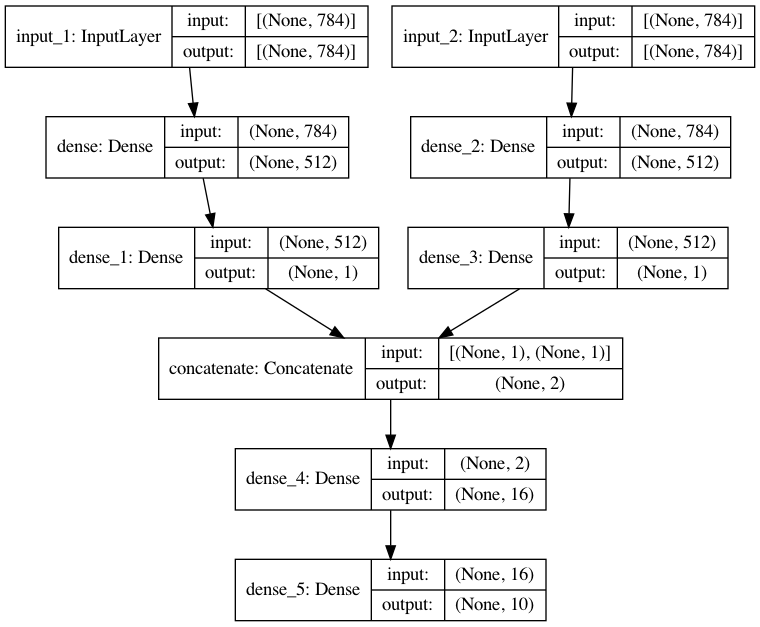

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [19]:
model.fit([combo_train_X_1, combo_train_X_2], 
                    train_labels,
                    batch_size=64, 
                    epochs=20)

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 0.5164 - accuracy: 0.8398 - mae: 0.0504
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4770 - accuracy: 0.8562 - mae: 0.0469
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4462 - accuracy: 0.8679 - mae: 0.0438
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4179 - accuracy: 0.8772 - mae: 0.0414
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3926 - accuracy: 0.8860 - mae: 0.0388
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3702 - accuracy: 0.8936 - mae: 0.0368
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3525 - accuracy: 0.9028 - mae: 0.0347
Epoch 8/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3320 - accuracy: 0.9071 - mae: 0.0329
Epoch 9/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3207 - accur

In [20]:
# # Print loss, mae and accuracy
evalmodel = model.evaluate([combo_val_X_1, 
                              combo_val_X_2], 
                              val_labels, 
                              verbose=2)
evalmodel

625/625 - 1s - loss: 1.4111 - accuracy: 0.8065 - mae: 0.0448


[1.4110708236694336, 0.8065000176429749, 0.04479643702507019]

In [18]:
combo_val_X_1.shape

(20000, 784)

In [19]:
combo_val_X_2.shape

(20000, 784)

In [29]:
# Perform k-fold cross-validation to understand the optimal number of epochs to train on
k = 4
num_val_samples = len(combo_val_X_1)//k

num_epochs = 20

all_val_mae_histories = []
all_train_mae_histories = []

for i in range(k):
    
    print('processing fold #', i)
    val_data_1 = combo_train_X_1[i * num_val_samples: (i + 1) * num_val_samples]
    val_data_2 = combo_train_X_2[i * num_val_samples: (i + 1) * num_val_samples]
    
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data_1 = np.concatenate(
    [combo_train_X_1[:i * num_val_samples],
    combo_train_X_1[(i+1) * num_val_samples:]],
    axis = 0)
    
    partial_train_data_2 = np.concatenate(
    [combo_train_X_2[:i * num_val_samples],
    combo_train_X_2[(i+1) * num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_labels[:i*num_val_samples],
    train_labels[(i+1)*num_val_samples:]],
    axis = 0)
    
    model = build_DNN_2_inputs()
    history = model.fit([partial_train_data_1, partial_train_data_2],
              partial_train_targets,
              validation_data = ([val_data_1, val_data_2], val_targets),
              epochs = num_epochs,
              batch_size = 64,
              verbose = 0)
    
    val_mae_history = history.history['val_mae']
    all_val_mae_histories.append(val_mae_history)
    
    train_mae_history = history.history['mae']
    all_train_mae_histories.append(train_mae_history)

processing fold # 0
Epoch 1/20
547/547 [==============================] - 2s 3ms/step - loss: 0.6353 - accuracy: 0.7939 - mae: 0.0608 - val_loss: 0.3920 - val_accuracy: 0.8700 - val_mae: 0.0397
Epoch 2/20
547/547 [==============================] - 2s 3ms/step - loss: 0.3096 - accuracy: 0.9011 - mae: 0.0313 - val_loss: 0.3394 - val_accuracy: 0.8908 - val_mae: 0.0324
Epoch 3/20
547/547 [==============================] - 2s 3ms/step - loss: 0.2089 - accuracy: 0.9358 - mae: 0.0212 - val_loss: 0.2677 - val_accuracy: 0.9158 - val_mae: 0.0238
Epoch 4/20
547/547 [==============================] - 2s 3ms/step - loss: 0.1484 - accuracy: 0.9542 - mae: 0.0155 - val_loss: 0.2372 - val_accuracy: 0.9264 - val_mae: 0.0208
Epoch 5/20
547/547 [==============================] - 2s 3ms/step - loss: 0.1038 - accuracy: 0.9676 - mae: 0.0113 - val_loss: 0.2338 - val_accuracy: 0.9280 - val_mae: 0.0187
Epoch 6/20
547/547 [==============================] - 2s 3ms/step - loss: 0.0714 - accuracy: 0.9784 - mae: 0.0

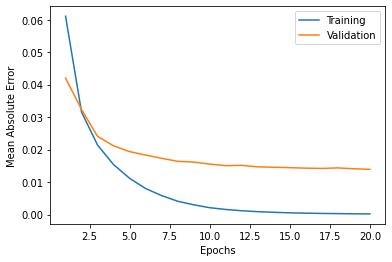

<Figure size 432x288 with 0 Axes>

In [31]:
# Compute the average of the per-epoch MAE scores for all folds
# Building the history of successive mean K-fold validation scores

average_val_mae_history = [
    np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

average_train_mae_history = [
    np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]


plt.plot(range(1, len(average_train_mae_history) + 1), average_train_mae_history, label = 'Training')
plt.plot(range(1, len(average_val_mae_history) + 1), average_val_mae_history, label='Validation')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
plt.savefig('Double_Input_DNN.png')

In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("Trained_Models/Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Trained_Models/Model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
# Verify above by visually inspecting images from the predicted set
num_val_images = 10000

Predicted: 5
True: 7


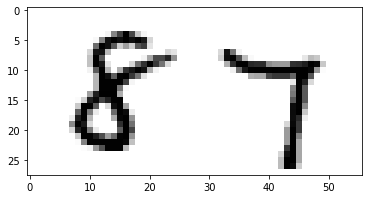

In [21]:
# Run this cell repeatedly to see multiple examples
check_index = random.randint(0,num_val_images)
plt.imshow(val_images[check_index].reshape(28,56), cmap = plt.cm.binary)
print("Predicted: " + str(np.argmax(y_predict[check_index])))
print("True: " + str(np.argmax(val_labels[check_index])))